In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [5]:
df=pd.read_csv("ProyecoReady.csv")

In [6]:
df.head()

,gameid,side,position,player,team,champion,ban1,ban2,ban3,ban4,...,goldat10,gdat10,goldat15,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15
0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,...,3078,-362,4670,-798,4530,-521,76,-14,116,-6
1,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,...,3684,-371,4912,-1366,3679,-249,60,-4,88,-17
2,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,...,3926,357,5487,-629,4751,218,88,3,131,-19
3,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,...,3579,-390,5313,-1829,3526,-6,87,11,119,-15
4,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,...,2088,-306,3163,-1156,2731,355,4,1,6,1


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['position'])
df['position2'] = le.transform(df['position'])

df.head()

,gameid,side,position,player,team,champion,ban1,ban2,ban3,ban4,...,goldat15,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15,side2,position2
0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,...,4670,-798,4530,-521,76,-14,116,-6,0,4
1,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,...,4912,-1366,3679,-249,60,-4,88,-17,0,1
2,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,...,5487,-629,4751,218,88,3,131,-19,0,2
3,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,...,5313,-1829,3526,-6,87,11,119,-15,0,0
4,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,...,3163,-1156,2731,355,4,1,6,1,0,3


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['champion'])
df['champion2'] = le.transform(df['champion'])

df.head()

,gameid,side,position,player,team,champion,ban1,ban2,ban3,ban4,...,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15,side2,position2,champion2
0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,...,-798,4530,-521,76,-14,116,-6,0,4,22
1,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,...,-1366,3679,-249,60,-4,88,-17,0,1,14
2,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,...,-629,4751,218,88,3,131,-19,0,2,53
3,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,...,-1829,3526,-6,87,11,119,-15,0,0,44
4,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,...,-1156,2731,355,4,1,6,1,0,3,78


In [171]:
X = df.iloc[:, [72,72]].values
y = df.iloc[:, 71].values

In [172]:
X
#datos campeon wards por minuto 

array([[22, 22],
       [14, 14],
       [53, 53],
       ...,
       [84, 84],
       [16, 16],
       [50, 50]])

In [173]:
y
#target, posicion 

array([4, 1, 2, ..., 2, 0, 3])

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [175]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [177]:
y_pred = classifier.predict(X_test)

In [178]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.818815331010453


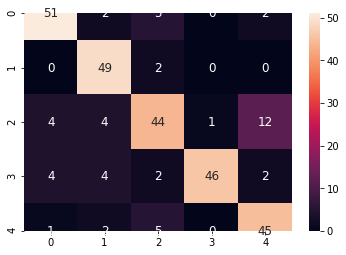

In [179]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) 

In [ ]:
#ADC 0
#jungle 1
#middle 2
#support 3
#top 4